来源：https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/

## 介绍

Metropolis-Hastings算法是一种MCMC算法。Markov Chain意味着下个样本的采集只需要考虑当前样本；Monte Carlo意味着算法会生成一些随机的样本，可以利用这些样本来计算一些数值解，比如对一个分布而言，可以计算其期望，中位数等。

算法的核心是转移矩阵Q(x->x')，它用来根据当前的样本/状态来确定下个样本/状态。此外利用接受率$\alpha$来决定是采用新样本还是保持旧样本，$\alpha$定义如下：

$\alpha=min(1,\frac{P(x')}{P(x)} \cdot \frac{Q(x'->x)}{Q(x->x')})$

其中$P(x)$为目标分布，即我们想要采样的分布。

当Q为对称矩阵时，$\alpha$变成：

$\alpha=min(1,\frac{P(x')}{P(x)})$

## 代码例子

In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns

In [21]:
"""
    两个要采样的对象
"""

# 圆心为(1,2)，半径为3的圆
def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2


# 二元高斯分布
# 输入点(x,y)，返回点处的概率密度
def pgauss(x, y):
    mus = np.array([5, 5])
    sigmas = np.array([[1, .9], [.9, 1]])

    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)

In [22]:
def metropolis_hastings(p, iterations=1000):
    # 初始样本
    x, y = 0., 0.
    
    # 存储所有样本
    samples = np.zeros((iterations, 2))

    for i in range(iterations):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        
        # p函数相当于为样本打分，新样本分数高于旧样本越多，则越可能被接受
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples

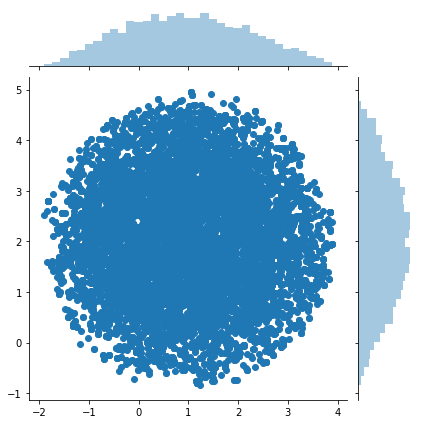

In [23]:
samples = metropolis_hastings(circle, 10000)
sns.jointplot(samples[:, 0], samples[:, 1])

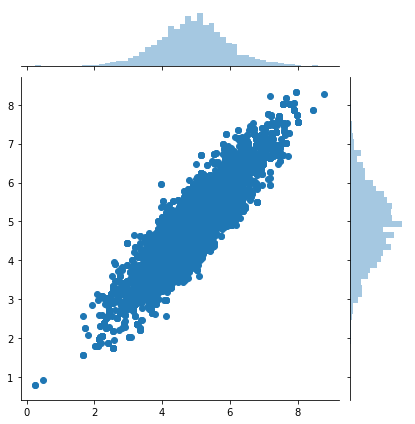

In [24]:
samples = metropolis_hastings(pgauss, 10000)
sns.jointplot(samples[:, 0], samples[:, 1])